# COVID-19 Andamento Nazionale

In [1]:
import numpy as np
import pandas as pd
import shutil
import seaborn as sns
import os
import matplotlib.dates as dates
from pathlib import Path, PosixPath
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# Per rimuovere la griglia dal grafico
# sns.set_style("white")

## Download data

In [3]:
dirpath = os.path.join('COVID-19')
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

!git clone https://github.com/pcm-dpc/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 1963, done.
remote: Total 1963 (delta 0), reused 0 (delta 0), pack-reused 1963
Receiving objects: 100% (1963/1963), 46.23 MiB | 6.13 MiB/s, done.
Resolving deltas: 100% (1416/1416), done.


## Read data

In [4]:
# Nazionale
country_df = pd.read_csv('./COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', index_col='data', parse_dates=True)

In [5]:
# Regionale
regione = 'Piemonte'
country_df = pd.read_csv('./COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv', index_col='data', parse_dates=True)
group = country_df.groupby('denominazione_regione')['denominazione_regione'].count()
country_df = country_df.loc[country_df['denominazione_regione'] == regione]

In [6]:
country_df.drop(['stato', 'note_it', 'note_en'], axis=1, inplace=True)

In [7]:
country_df.tail()

,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,,,,,
2020-04-07 17:00:00,1,Piemonte,45.073274,7.680687,3553,432,3985,6719,10704,159,419,1320,1319,13343,44121
2020-04-08 17:00:00,1,Piemonte,45.073274,7.680687,3493,423,3916,7073,10989,285,540,1516,1378,13883,48495
2020-04-09 17:00:00,1,Piemonte,45.073274,7.680687,3514,412,3926,7410,11336,347,639,1732,1454,14522,52807
2020-04-10 17:00:00,1,Piemonte,45.073274,7.680687,3497,394,3891,7685,11576,240,490,1904,1532,15012,57457
2020-04-11 17:00:00,1,Piemonte,45.073274,7.680687,3435,384,3819,8351,12170,594,996,2205,1633,16008,62577


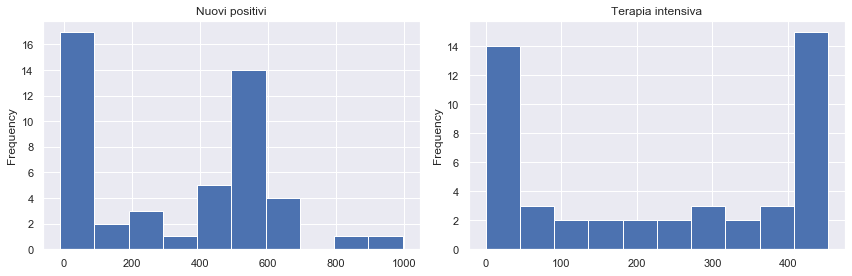

In [8]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

country_df['nuovi_positivi'].plot.hist(bins=10, ax=axes[0], title='Nuovi positivi')
country_df['terapia_intensiva'].plot.hist(bins=10, ax=axes[1], title='Terapia intensiva')

plt.tight_layout()

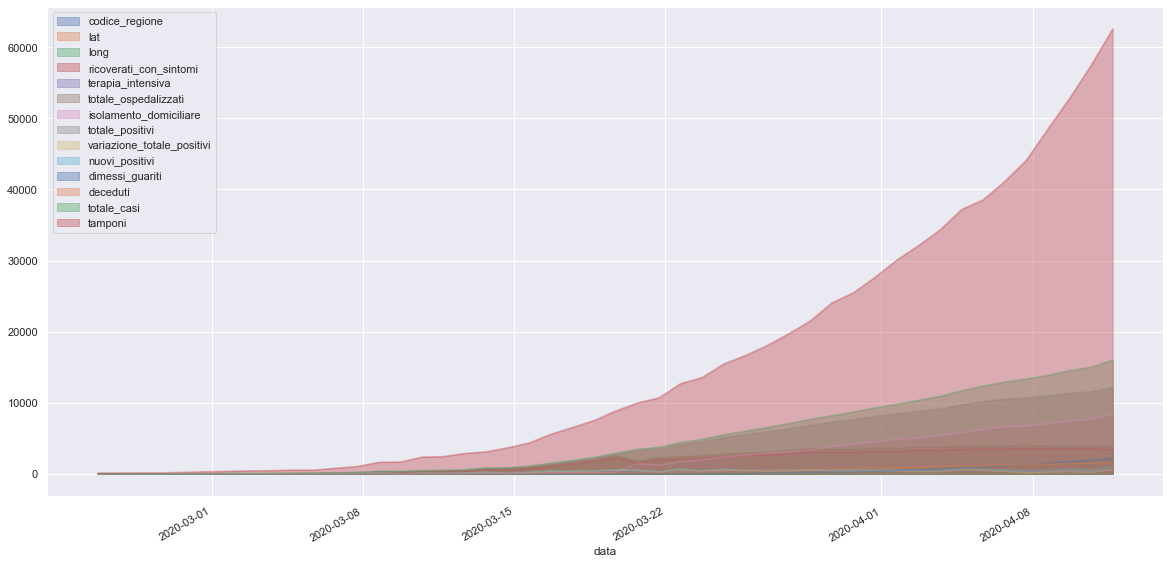

In [9]:
country_df.plot.area(alpha=0.4, figsize=(20,10),stacked=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


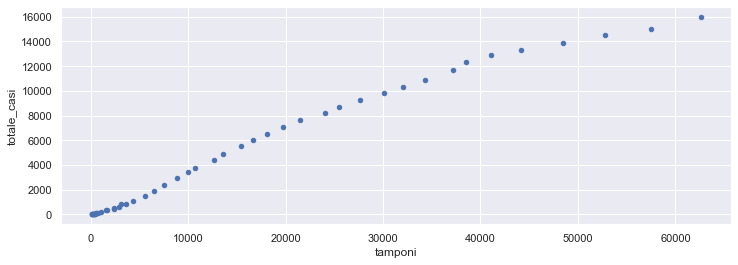

In [10]:
country_df.plot.scatter(x='tamponi',y='totale_casi', figsize=(12,4))

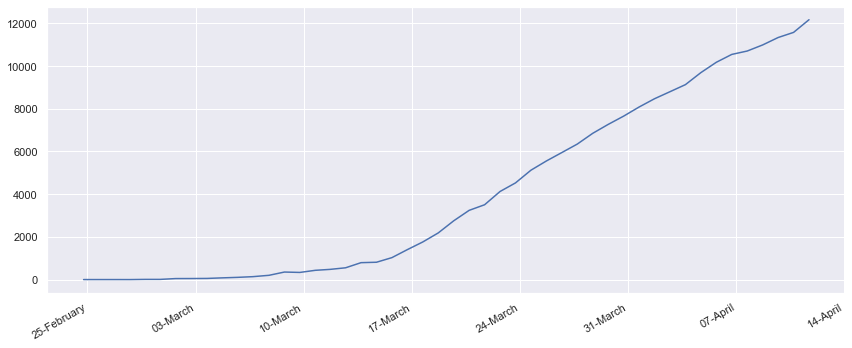

In [11]:
#country_df['totale_positivi'].plot(figsize=(12,5))


fig, ax = plt.subplots(figsize=(12,5))
ax.plot_date(country_df.index, country_df['totale_positivi'],'-')

# Grids
ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Major Axis
ax.xaxis.set_major_locator(dates.WeekdayLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%d-%B'))

fig.autofmt_xdate() # Auto fixes the overlap!
plt.tight_layout()


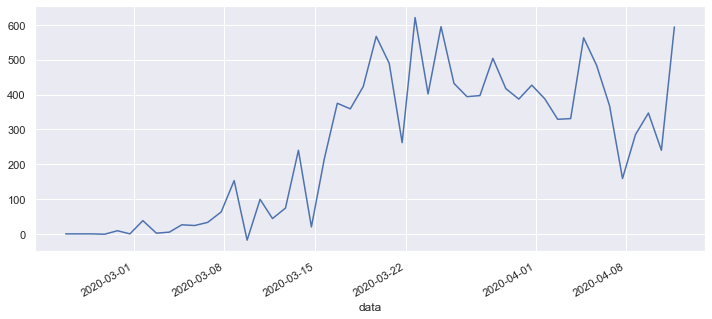

In [12]:
country_df['variazione_totale_positivi'].plot(figsize=(12,5))

### Nuovi persone positive

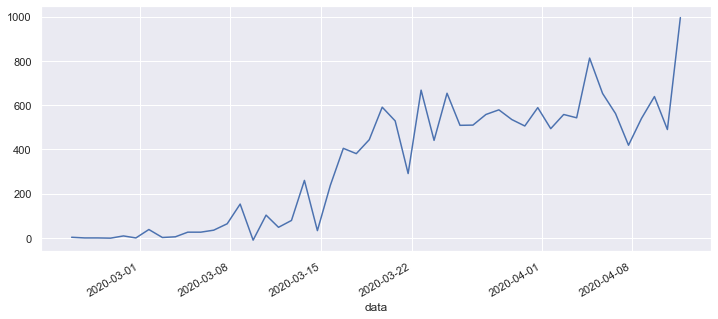

In [13]:
country_df['nuovi_positivi'].plot(figsize=(12,5))

### Tamponi

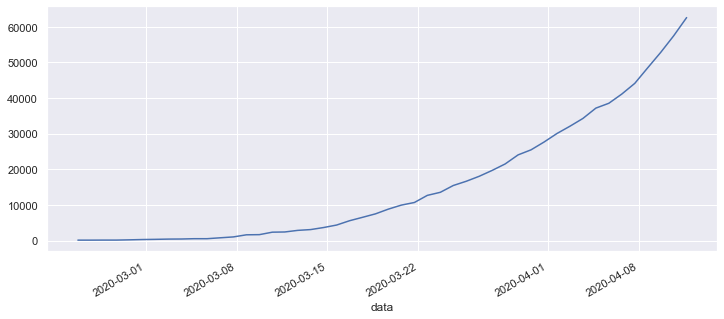

In [14]:
country_df['tamponi'].plot(figsize=(12,5))

#### Incremento giornaliero

In [15]:
country_df['daily_tamponi'] = country_df['tamponi'] - country_df['tamponi'].shift(1)

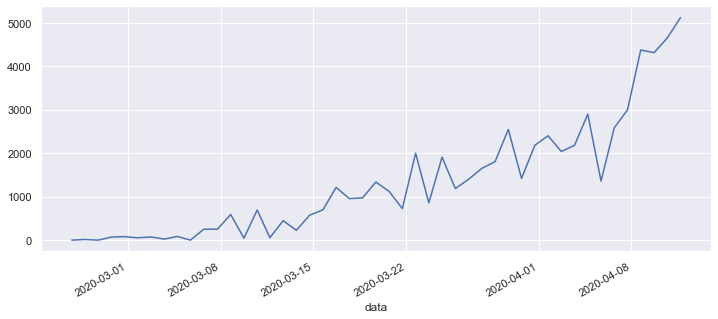

In [16]:
country_df['daily_tamponi'].plot(figsize=(12,5))

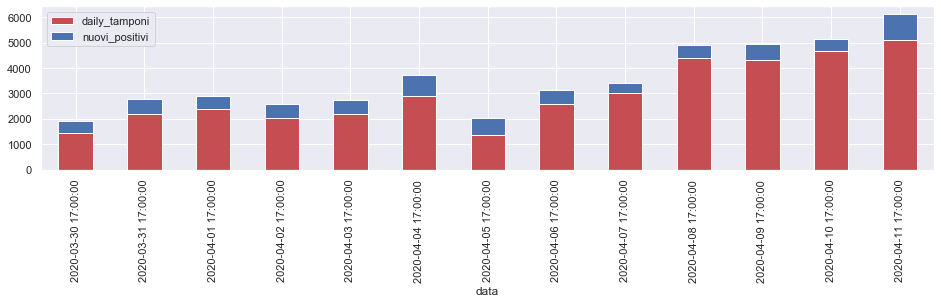

In [17]:
tamponi_df = country_df[['daily_tamponi','nuovi_positivi']]
tamponi_df.loc['2020-03-30':'2020-04-11'].plot.bar(stacked=True, figsize=(16,3),color=['r','b']);